<a href="https://colab.research.google.com/github/viralRupani/Data-Science/blob/main/Programming_Languages_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
df = pd.read_csv('QueryResults.csv', header=0, names=['DATE', 'TAG', 'POSTS'])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
print(df.head())
print(df.tail())

                  DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     83
3  2008-08-01 00:00:00        c#    505
4  2008-08-01 00:00:00       c++    164
                     DATE     TAG  POSTS
2379  2022-11-01 00:00:00     php   3930
2380  2022-11-01 00:00:00  python  24918
2381  2022-11-01 00:00:00       r   4796
2382  2022-11-01 00:00:00    ruby    475
2383  2022-11-01 00:00:00   swift   1829


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
print(f'Data has {df.shape[0]} rows and {df.shape[1]} columns')
print(f'Data has {df.ndim} dimensions.')

Data has 2384 rows and 3 columns
Data has 2 dimensions.


In [ ]:
print(df.isna().values.any())

False


**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
print(f"{df[['DATE']].count()} \n")
print(f"{df[['TAG']].count()} \n")
print(f"{df[['POSTS']].count()} \n")

DATE    2384
dtype: int64 

TAG    2384
dtype: int64 

POSTS    2384
dtype: int64 



**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,41665
c,389478
c#,1569899
c++,782589
delphi,50333
go,65983
java,1876071
javascript,2450181
perl,67307


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [ ]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,172,172
c,172,172
c#,173,173
c++,172,172
delphi,172,172
go,157,157
java,172,172
javascript,172,172
perl,172,172


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
print(df['DATE'][1])
print(type(df['DATE'][1]))

2008-08-01 00:00:00
<class 'str'>


In [ ]:
print(pd.to_datetime(df['DATE'][1]))
type(pd.to_datetime(df['DATE'][1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# Converting entire col to date time from string
df['DATE'] = pd.to_datetime(df['DATE'])

In [ ]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [ ]:
reshaped_df = df.pivot(columns='TAG', index='DATE', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
reshaped_df.shape

(173, 14)

In [ ]:
print(reshaped_df.head())
print(reshaped_df.tail())
print(reshaped_df.columns)

TAG         assembly      c      c#    c++  delphi  go    java  javascript  \
DATE                                                                         
2008-07-01       NaN    NaN     3.0    NaN     NaN NaN     NaN         NaN   
2008-08-01       8.0   83.0   505.0  164.0    14.0 NaN   222.0       163.0   
2008-09-01      28.0  318.0  1645.0  753.0   104.0 NaN  1131.0       635.0   
2008-10-01      15.0  303.0  1988.0  808.0   112.0 NaN  1149.0       724.0   
2008-11-01      17.0  259.0  1731.0  734.0   141.0 NaN   957.0       581.0   

TAG          perl    php  python    r   ruby  swift  
DATE                                                 
2008-07-01    NaN    NaN     NaN  NaN    NaN    NaN  
2008-08-01   28.0  158.0   120.0  NaN   70.0    NaN  
2008-09-01  130.0  476.0   537.0  6.0  287.0    NaN  
2008-10-01  127.0  612.0   508.0  NaN  247.0    NaN  
2008-11-01   97.0  501.0   451.0  1.0  158.0    NaN  
TAG         assembly       c      c#     c++  delphi     go    java  \
DATE

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [ ]:
reshaped_df.count()

TAG
assembly      172
c             172
c#            173
c++           172
delphi        172
go            157
java          172
javascript    172
perl          172
php           172
python        172
r             170
ruby          172
swift         164
dtype: int64

In [ ]:
reshaped_df.fillna(0, inplace=True)

In [ ]:
reshaped_df.count()

TAG
assembly      173
c             173
c#            173
c++           173
delphi        173
go            173
java          173
javascript    173
perl          173
php           173
python        173
r             173
ruby          173
swift         173
dtype: int64

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

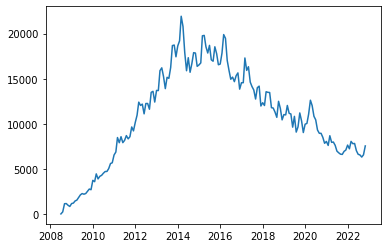

In [ ]:
plt.plot(reshaped_df.index, reshaped_df['java'])

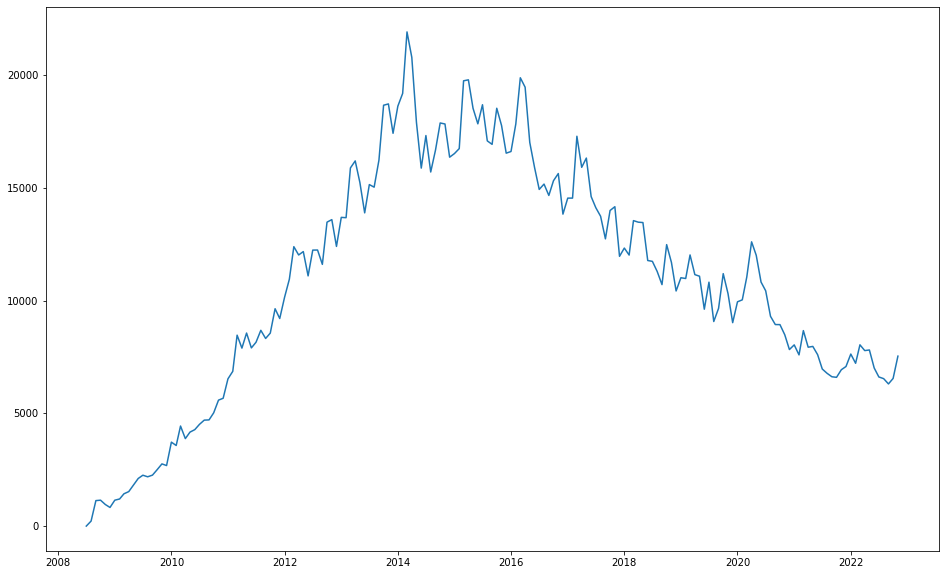

In [ ]:
plt.figure(figsize=(16, 10))
plt.plot(reshaped_df.index, reshaped_df.java)

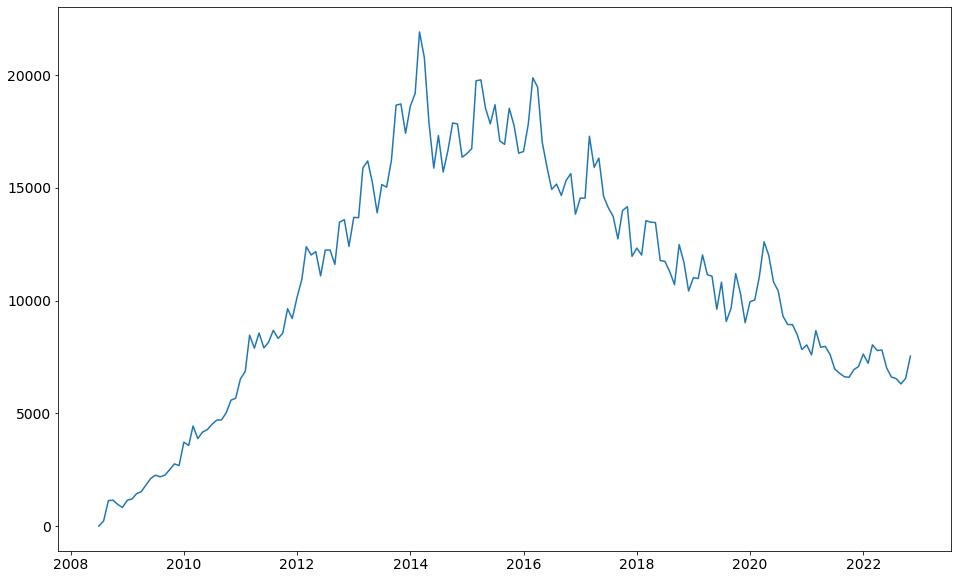

In [ ]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df['java'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

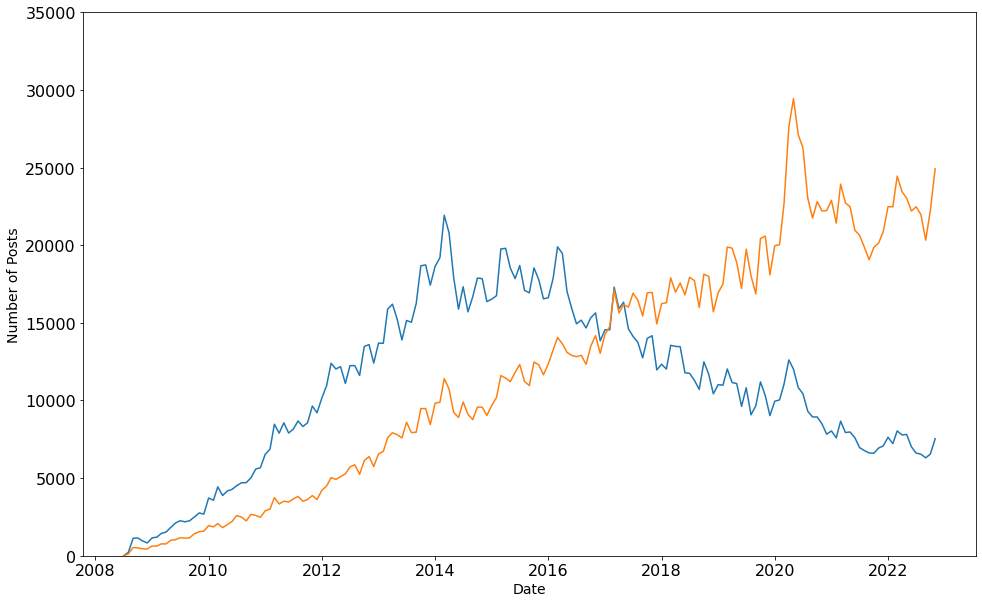

In [ ]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java'])
plt.plot(reshaped_df.index, reshaped_df['python'])

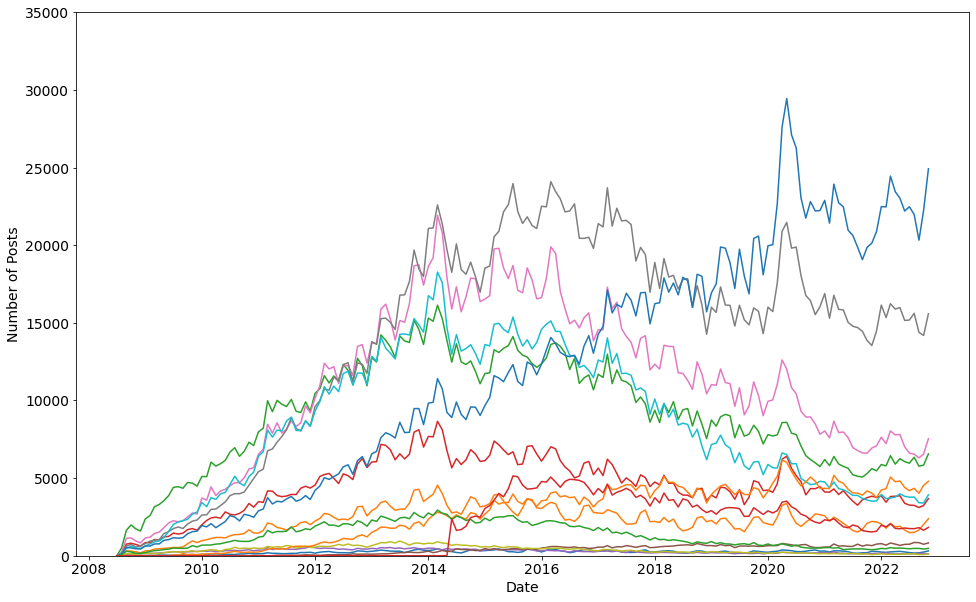

In [ ]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column])

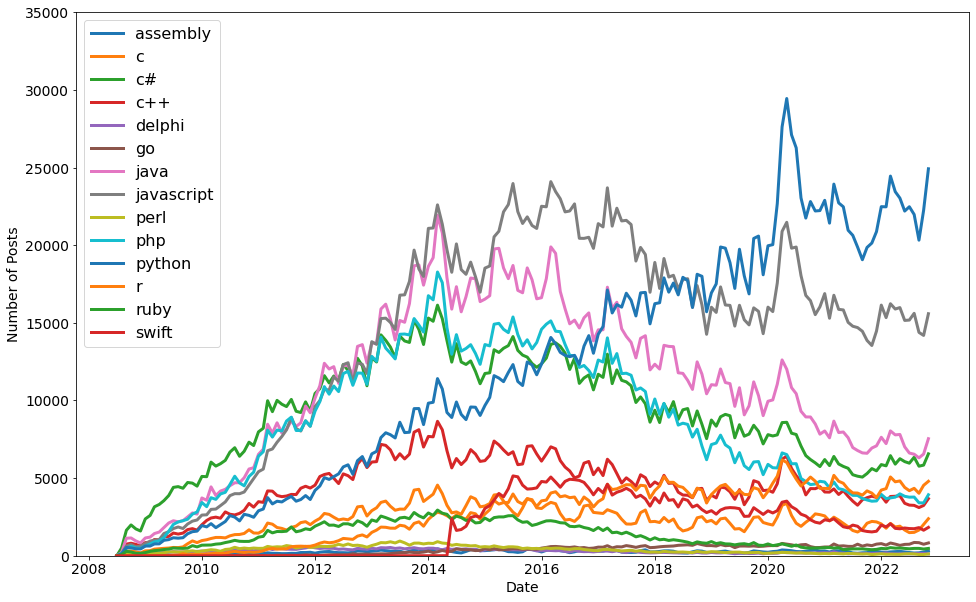

In [ ]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16) 

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

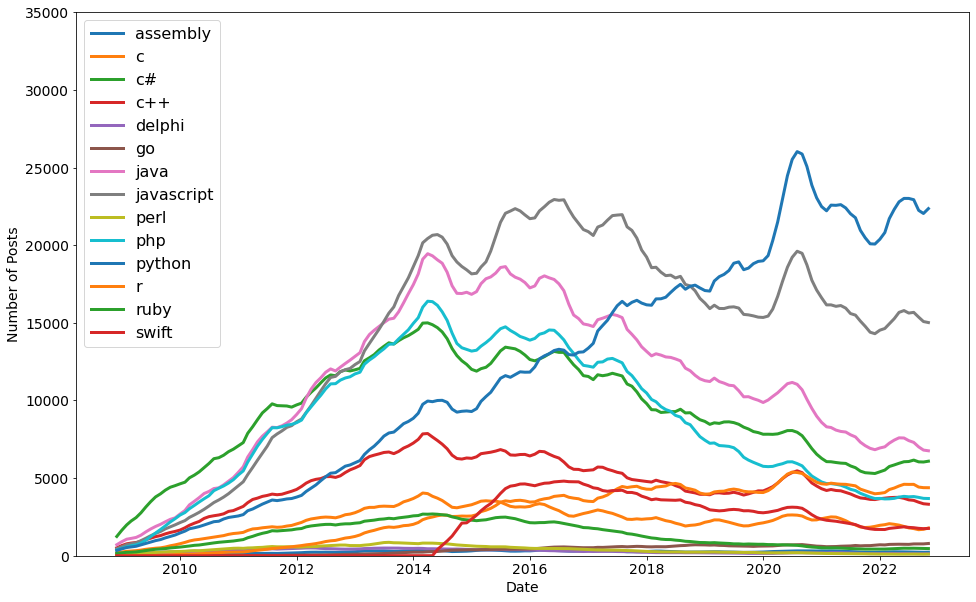

In [49]:

rool_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in rool_df.columns:
  plt.plot(rool_df.index, rool_df[column], linewidth=3, label=rool_df[column].name)


plt.legend(fontsize=16)

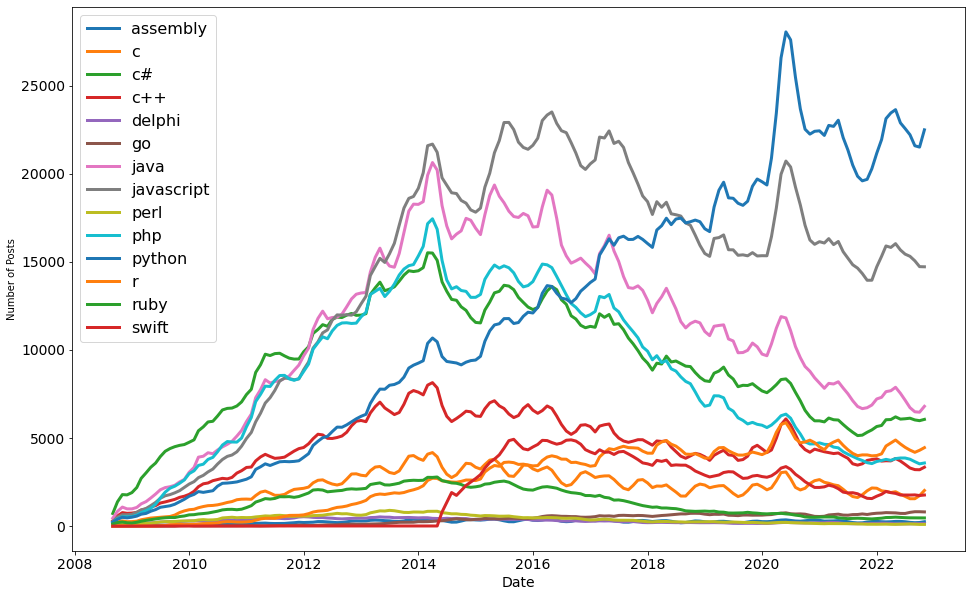

In [48]:
rool_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts')

for column in rool_df.columns:
  plt.plot(rool_df.index, rool_df[column], linewidth=3, label=rool_df[column].name)

plt.legend(fontsize=16)

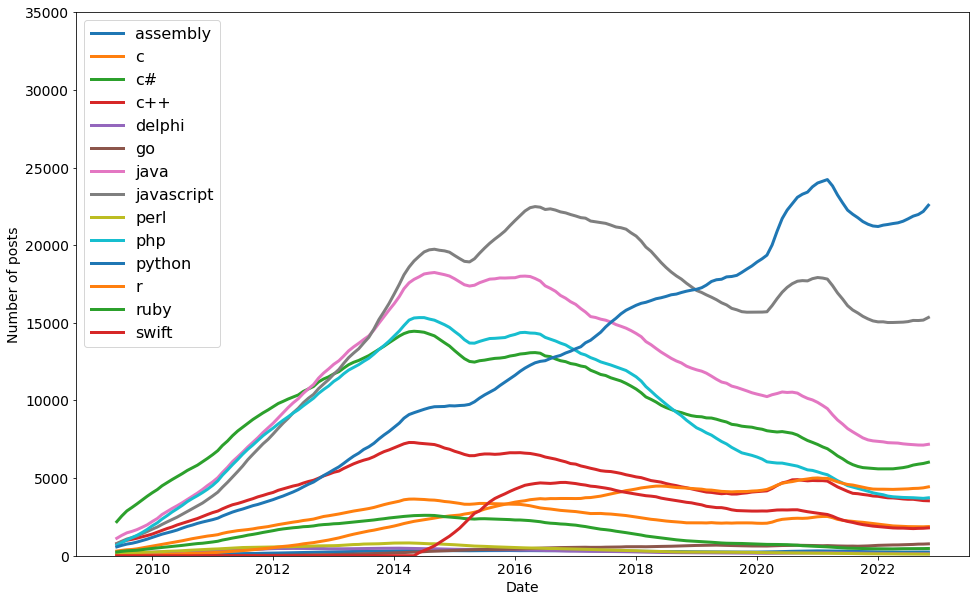

In [47]:
rool_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)

for column in rool_df.columns:
  plt.plot(rool_df.index, rool_df[column], linewidth=3, label=rool_df[column].name)

plt.legend(fontsize=16)